### What if we have 60,000 of these images and their label?

In [1]:
import numpy as np

In [2]:
from load_mnist import mnist
X_train, X_test, y_train2, y_test2 = mnist(onehot=True)

In [3]:
y_train = np.argmax(y_train2, axis=1)
y_test = np.argmax(y_test2, axis=1)

In [4]:
#np.random.seed(123)
#rand = np.random.randint(0, X_train.shape[0], int(X_train.shape[0]*0.05))
#X_train = X_train[rand]
#y_train = y_train[rand]
#X_train.shape

# Logistic Regression

In [4]:
import pandas as pd
res = pd.DataFrame(columns=['accuracy', 'parameters'])

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [7]:
res.loc['Logistic Regression', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Logistic Regression', 'parameters'] = lr.coef_.shape[0] * lr.coef_.shape[1] 

In [8]:
res

,accuracy,parameters
Logistic Regression,0.9201,7840


# Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [42]:
res.loc['Decision Tree', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Decision Tree', 'parameters'] = dt.tree_.node_count 
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8664,1703
Naive Bayes,0.8357,7840
Random Forest,0.9314,16572
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,19626
Simple Neural Network,0.9556,496250
Complex Neural Network,0.9874,886875
Convolutional Neural Network,0.9928,1018698


# Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [12]:
res.loc['Naive Bayes', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Naive Bayes', 'parameters'] = nb.coef_.shape[0] * nb.coef_.shape[1] 
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, max_depth=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [39]:
nodes = 0
for tree in rf.estimators_:
    nodes += tree.tree_.node_count 

In [40]:
res.loc['Simple Random Forest', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Simple Random Forest', 'parameters'] = nodes
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9314,16572
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,19626
Simple Neural Network,0.9556,496250
Complex Neural Network,0.9874,886875
Convolutional Neural Network,0.9928,1018698


RF v2

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_jobs=-1, n_estimators=50)
rf2.fit(X_train, y_train)
y_pred = rf2.predict(X_test)

In [47]:
nodes = 0
for tree in rf2.estimators_:
    nodes += tree.tree_.node_count 

In [48]:
res.loc['Complex Random Forest', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Complex Random Forest', 'parameters'] = nodes
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8664,1703
Naive Bayes,0.8357,7840
Random Forest,0.9314,16572
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,19626
Simple Neural Network,0.9556,496250
Complex Neural Network,0.9874,886875
Convolutional Neural Network,0.9928,1018698
Random Forest 500,0.9689,498536


# Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

In [17]:
nodes = 0
for temp in gb.estimators_:
    for tree in temp:
        nodes += tree.tree_.node_count 
nodes

14798

In [18]:
res.loc['Gradient Boosting', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Gradient Boosting', 'parameters'] = nodes
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9475,99404
Gradient Boosting,0.9487,14798


# Support Vector Machines

In [19]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [20]:
res.loc['Support Vector Machines', 'accuracy'] = np.mean(y_test == y_pred)
res.loc['Support Vector Machines', 'parameters'] = svc.support_vectors_.shape[0] * svc.support_vectors_.shape[1]
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9475,99404
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,15386784


In [31]:
res.loc['Support Vector Machines', 'parameters'] = svc.support_vectors_.shape[0]
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9475,99404
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,19626
Simple Neural Network,0.9556,496250
Complex Neural Network,0.9874,886875
Convolutional Neural Network,0.9928,1018698


# NN

Softmax

In [21]:
import theano
from theano import tensor as T
import numpy as np
import datetime as dt

theano.config.floatX = 'float32'

def floatX(X):
#     return np.asarray(X, dtype='float32')
    return np.asarray(X, dtype=theano.config.floatX)

def init_weights(shape):
    return theano.shared(floatX(np.random.randn(*shape) * 0.01))

def model(X, w):
    return T.nnet.softmax(T.dot(X, w))

X = T.fmatrix()
Y = T.fmatrix()

w = init_weights((784, 10))

w.get_value()


py_x = model(X, w)
y_pred = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
gradient = T.grad(cost=cost, wrt=w)
update = [[w, w - gradient * 0.05]]

train = theano.function(inputs=[X, Y], outputs=cost, updates=update, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_pred, allow_input_downcast=True)

# Simple Neural Net

In [22]:
def sgd(cost, params, lr=0.05):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        updates.append([p, p - g * lr])
    return updates

def model(X, w_h, w_o):
    h = T.nnet.sigmoid(T.dot(X, w_h))
    pyx = T.nnet.softmax(T.dot(h, w_o))
    return pyx

w_h = init_weights((784, 625))
w_o = init_weights((625, 10))

py_x = model(X, w_h, w_o)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(py_x, Y))
params = [w_h, w_o]
updates = sgd(cost, params)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

In [23]:
t0 = dt.datetime.now()

errors = []
for i in range(100):
    
    for start, end in zip(range(0, X_train.shape[0], 128), 
                          range(128, X_train.shape[0], 128)):
        cost = train(X_train[start:end], y_train2[start:end])
        
    errors.append((np.mean(y_train != predict(X_train)), 
                   np.mean(y_test != predict(X_test))))

print('Total time: ', (dt.datetime.now()-t0).seconds / 60.)

Total time:  6.616666666666666


In [24]:
res.loc['Simple Neural Network', 'accuracy'] = 1 - errors[-1][1]
res.loc['Simple Neural Network', 'parameters'] = 784 * 625 + 625*10
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9475,99404
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,15386784
Simple Neural Network,0.9556,496250


# Complex Neural Net

Two hidden layers with dropout


In [25]:
from theano.sandbox.rng_mrg import MRG_RandomStreams as RandomStreams

srng = RandomStreams()

def rectify(X):
    return T.maximum(X, 0.)

def RMSprop(cost, params, lr=0.001, rho=0.9, epsilon=1e-6):
    grads = T.grad(cost=cost, wrt=params)
    updates = []
    for p, g in zip(params, grads):
        acc = theano.shared(p.get_value() * 0.)
        acc_new = rho * acc + (1 - rho) * g ** 2
        gradient_scaling = T.sqrt(acc_new + epsilon)
        g = g / gradient_scaling
        updates.append((acc, acc_new))
        updates.append((p, p - lr * g))
    return updates

def dropout(X, p=0.):
    if p > 0:
        retain_prob = 1 - p
        X *= srng.binomial(X.shape, p=retain_prob, dtype=theano.config.floatX)
        X /= retain_prob
    return X

def model(X, w_h, w_h2, w_o, p_drop_input, p_drop_hidden):
    X = dropout(X, p_drop_input)
    h = rectify(T.dot(X, w_h))

    h = dropout(h, p_drop_hidden)
    h2 = rectify(T.dot(h, w_h2))

    h2 = dropout(h2, p_drop_hidden)
    py_x = softmax(T.dot(h2, w_o))
    return h, h2, py_x

def softmax(X):
    e_x = T.exp(X - X.max(axis=1).dimshuffle(0, 'x'))
    return e_x / e_x.sum(axis=1).dimshuffle(0, 'x')

w_h = init_weights((784, 625))
w_h2 = init_weights((625, 625))
w_o = init_weights((625, 10))

noise_h, noise_h2, noise_py_x = model(X, w_h, w_h2, w_o, 0.2, 0.5)
h, h2, py_x = model(X, w_h, w_h2, w_o, 0., 0.)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [w_h, w_h2, w_o]
updates = RMSprop(cost, params, lr=0.001)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

t0 = dt.datetime.now()

errors = []
for i in range(100):
    
    for start, end in zip(range(0, X_train.shape[0], 128), 
                          range(128, X_train.shape[0], 128)):
        cost = train(X_train[start:end], y_train2[start:end])
        
    errors.append((np.mean(y_train != predict(X_train)), 
                   np.mean(y_test != predict(X_test))))
print('Total time: ', (dt.datetime.now()-t0).seconds / 60.)

Total time:  18.9


In [26]:
res.loc['Complex Neural Network', 'accuracy'] = 1 - errors[-1][1]
res.loc['Complex Neural Network', 'parameters'] = 784 * 625 + 625* 625 + 625*10
res

,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9475,99404
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,15386784
Simple Neural Network,0.9556,496250
Complex Neural Network,0.9874,886875


# Convolutional Neural Network



In [27]:
# from theano.tensor.nnet.conv import conv2d
from theano.tensor.nnet import conv2d
from theano.tensor.signal.downsample import max_pool_2d

def model(X, w, w2, w3, w4, w_o, p_drop_conv, p_drop_hidden):
    l1a = rectify(conv2d(X, w, border_mode='full'))
    l1 = max_pool_2d(l1a, (2, 2))
    l1 = dropout(l1, p_drop_conv)

    l2a = rectify(conv2d(l1, w2))
    l2 = max_pool_2d(l2a, (2, 2))
    l2 = dropout(l2, p_drop_conv)

    l3a = rectify(conv2d(l2, w3))
    l3b = max_pool_2d(l3a, (2, 2))
    # convert from 4tensor to normal matrix
    l3 = T.flatten(l3b, outdim=2)
    l3 = dropout(l3, p_drop_conv)

    l4 = rectify(T.dot(l3, w4))
    l4 = dropout(l4, p_drop_hidden)

    pyx = softmax(T.dot(l4, w_o))
    return l1, l2, l3, l4, pyx

X_train2 = X_train.reshape(-1, 1, 28, 28)
X_test2 = X_test.reshape(-1, 1, 28, 28)

# now 4tensor for conv instead of matrix
X = T.ftensor4()
Y = T.fmatrix()

w = init_weights((32, 1, 3, 3))
w2 = init_weights((64, 32, 3, 3))
w3 = init_weights((128, 64, 3, 3))
w4 = init_weights((128 * 3 * 3, 625))
w_o = init_weights((625, 10))

noise_l1, noise_l2, noise_l3, noise_l4, noise_py_x = model(X, w, w2, w3, w4, w_o, 0.2, 0.5)
l1, l2, l3, l4, py_x = model(X, w, w2, w3, w4, w_o, 0., 0.)
y_x = T.argmax(py_x, axis=1)

cost = T.mean(T.nnet.categorical_crossentropy(noise_py_x, Y))
params = [w, w2, w3, w4, w_o]
updates = RMSprop(cost, params, lr=0.001)

train = theano.function(inputs=[X, Y], outputs=cost, updates=updates, allow_input_downcast=True)
predict = theano.function(inputs=[X], outputs=y_x, allow_input_downcast=True)

t0 = dt.datetime.now()

errors = []
for i in range(100):
    t1 = dt.datetime.now()
    
    for start, end in zip(range(0, X_train.shape[0], 128), 
                          range(128, X_train.shape[0], 128)):
        cost = train(X_train2[start:end], y_train2[start:end])
        
    errors.append((np.mean(y_train != predict(X_train2)), 
                   np.mean(y_test != predict(X_test2))))
    print(i, errors[-1])
    print('Current iter time: ', (dt.datetime.now()-t1).seconds / 60.)

print('Total time: ', (dt.datetime.now()-t0).seconds / 60.)

/home/al/anaconda3/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/al/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: UserWarning: pool_2d() will have the parameter ignore_border default value changed to True (currently False). To have consistent behavior with all Theano version, explicitly add the parameter ignore_border=True. On the GPU, using ignore_border=True is needed to use cuDNN. When using ignore_border=False and not using cuDNN, the only GPU combination supported is when `ds == st and padding == (0, 0) and mode == 'max'`. Otherwise, the convolution will be executed on CPU.
/home/al/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: UserWarning: pool_2d() will have the parameter ignore_border default value changed to True (currently False). To have consistent beh

0 (0.089633333333333329, 0.082600000000000007)
Current iter time:  2.75
1 (0.025083333333333332, 0.0229)
Current iter time:  2.7
2 (0.017583333333333333, 0.0152)
Current iter time:  2.683333333333333
3 (0.010616666666666667, 0.0112)
Current iter time:  2.6166666666666667
4 (0.0093166666666666658, 0.010999999999999999)
Current iter time:  2.6666666666666665
5 (0.0083833333333333329, 0.0088999999999999999)
Current iter time:  3.033333333333333
6 (0.00545, 0.0085000000000000006)
Current iter time:  2.95
7 (0.0062333333333333329, 0.0089999999999999993)
Current iter time:  2.7333333333333334
8 (0.0051833333333333332, 0.0071999999999999998)
Current iter time:  2.75


KeyboardInterrupt: 

In [29]:
res.loc['Convolutional Neural Network', 'accuracy'] = 1 - errors[-1][1]
res.loc['Convolutional Neural Network', 'parameters'] = 200000 + 32* 1* 3* 3 +64* 32* 3* 3 +128* 64* 3* 3 +128 * 3 * 3* 625+ 625* 10
res


,accuracy,parameters
Logistic Regression,0.9201,7840
Decision Tree,0.8794,7873
Naive Bayes,0.8357,7840
Random Forest,0.9475,99404
Gradient Boosting,0.9487,14798
Support Vector Machines,0.9446,15386784
Simple Neural Network,0.9556,496250
Complex Neural Network,0.9874,886875
Convolutional Neural Network,0.9928,1018698


In [140]:
res.to_csv('res_mnist_complexity.csv')

# PLOTS

In [6]:
res = pd.read_csv('res_mnist_complexity.csv', index_col=0)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.style.use('fivethirtyeight')

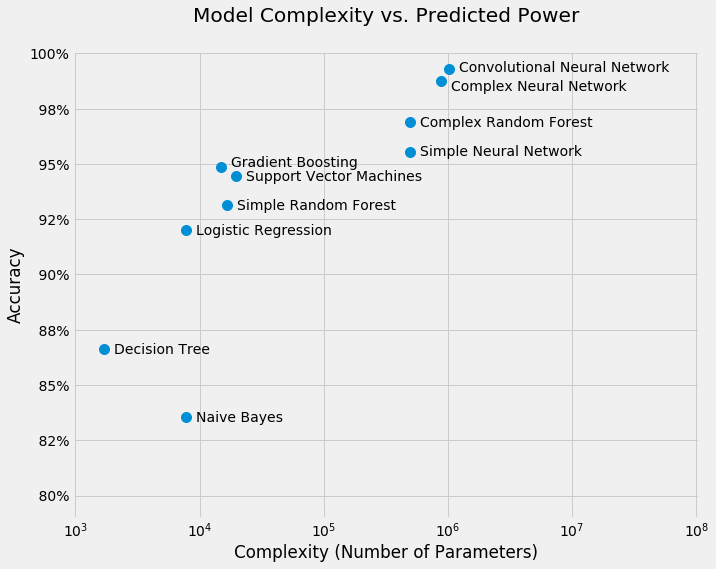

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

plt.semilogx(res.parameters, res.accuracy, marker='o', lw=0, markersize=10)
plt.ylim([0.79, 1.001])
plt.xlim([950, 105000000])
plt.xlabel('Complexity (Number of Parameters)')
plt.ylabel('Accuracy')

vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])
plt.title('Model Complexity vs. Predicted Power', y=1.05)

for label, x, y in zip(res.index, res.parameters, res.accuracy):
    if label == 'Gradient Boosting':
        temp = 5
    elif label == 'Convolutional Neural Network':
        temp = 2
    elif label == 'Complex Neural Network':
        temp = -5
    else:
        temp = 0
    plt.annotate(
        label, 
        xy = (x, y), xytext = (10, -7.5+temp),
        textcoords = 'offset points', ha = 'left', va = 'bottom')
    
plt.savefig('complexity.png', dpi=300, pad_inches=3)